In [5]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)

from src.utils import LOGGER

CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp_mlp_plr"
log_name = "MLP_PLR_log"

log_path = os.path.join(CHECKPOINT_DIR, log_name)
LOGGER.load(log_path)  # обязательно загружаем


In [6]:
CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp_mlp_plr"
log_name = "MLP_PLR_log"
keys = [ key for key in LOGGER.dict.keys()]
keys

['loss',
 'embedding.periodic.weight',
 'embedding.linear.weight',
 'embedding.linear.bias']

In [7]:
key = keys[1]


last_iters_percentile = 0.999

frequencies: (9370, 784, 32), losses: (9370,)


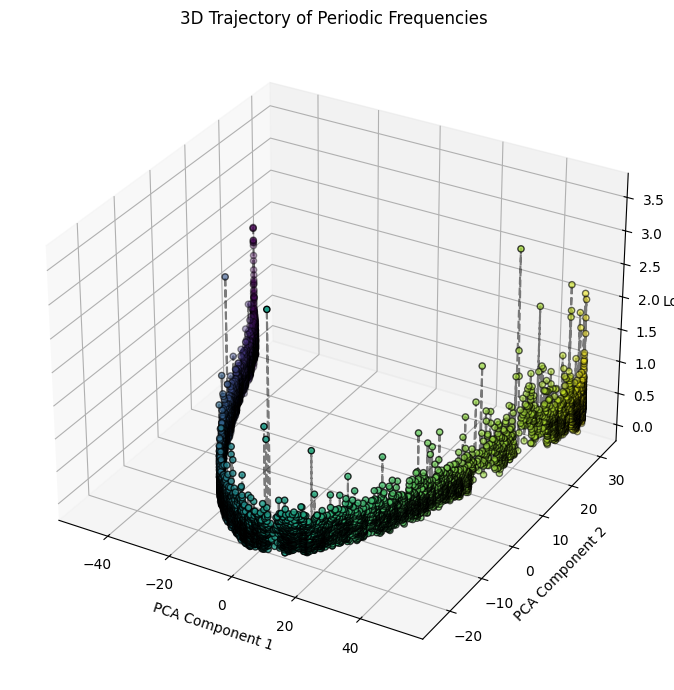

In [9]:
LOGGER.reset()
LOGGER.load(os.path.join(CHECKPOINT_DIR, log_name))

frequencies = np.array(LOGGER.dict[key])
losses = np.array(LOGGER.dict["loss"])

frequencies = frequencies[-int(last_iters_percentile * len(frequencies)):]
losses = losses[-int(last_iters_percentile * len(losses)):]

print(f"frequencies: {frequencies.shape}, losses: {losses.shape}")

flat_weights = frequencies.reshape(frequencies.shape[0], -1)

pca = PCA(n_components=2)
trajectory_2d = pca.fit_transform(flat_weights)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = np.linspace(0, 1, len(flat_weights))
ax.scatter(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    c=colors, cmap='viridis', edgecolor='k'
)
ax.plot(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    color='black', alpha=0.5, linestyle='--'
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Loss')
ax.set_title(f"3D Trajectory of Periodic Frequencies")
plt.tight_layout()
plt.show()



## loss

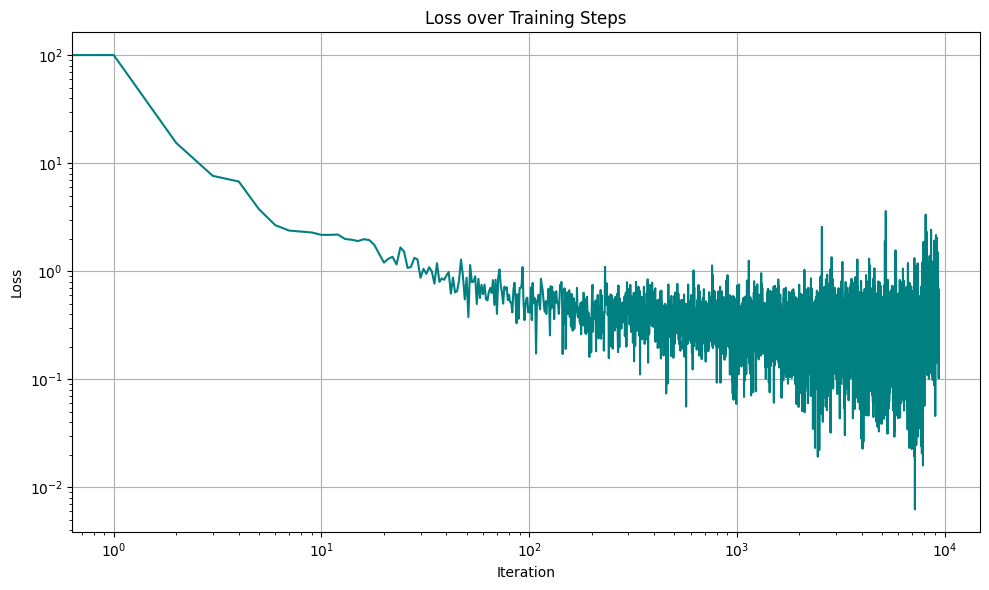

In [10]:
losses = np.array(LOGGER.dict["loss"])

plt.figure(figsize=(10, 6))
plt.loglog(losses, color='teal')
plt.title("Loss over Training Steps")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

## Weights visulisation

In [11]:
weights = LOGGER.dict[key]
weights = np.array(weights)

In [12]:
weights.shape

(9380, 784, 32)

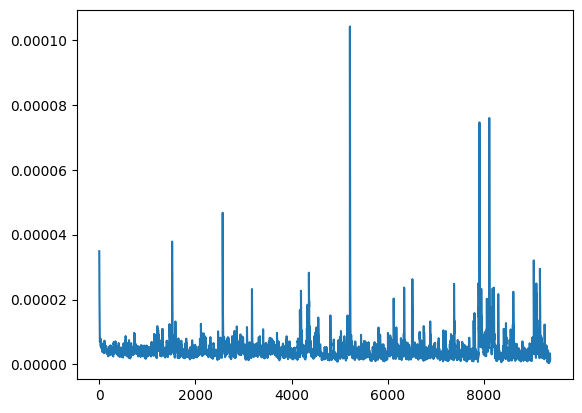

In [13]:
delta_weights = weights[1:] - weights[:-1]

norms = (delta_weights**2).mean(axis=-1).mean(axis=-1)
plt.plot(norms)